In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import matplotlib as mpl
import numpy as np

In [2]:
# load the predictions
def load_deepbake_pred():
    preds = glob("deepbake_s13*predictions.tsv")
    df = pd.concat([pd.read_csv(f,sep='\t') for f in preds],ignore_index=True)
    df.sort_values(['episode','finalist'],inplace=True)
    return df

In [3]:
df = load_deepbake_pred()
df[df['baker']=='Syabira'].tail(12).style.background_gradient('BuGn')

,season,baker,episode,tech_mean,tech,mean_star,star,mean_good,good,mean_bad,bad,preds,bottom,finalist,top3,fifthseventh,thirdforth
10,13,Syabira,1,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0,0.530000,22.600000,58.130000,0.580000,40.760000
82,13,Syabira,2,0.197531,0.909091,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2,0.070000,26.970000,47.500000,0.060000,52.370000
94,13,Syabira,3,0.464158,0.727273,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2,0.090000,22.300000,41.400000,0.070000,58.440000
106,13,Syabira,4,0.333333,0.272727,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0,0.840000,18.100000,54.780000,1.060000,43.320000
70,13,Syabira,5,0.708333,1.000000,0.000000,0.000000,0.818182,0.000000,0.500000,1.000000,0,0.080000,21.060000,65.080000,0.060000,34.790000
34,13,Syabira,6,0.555556,0.454545,0.777778,1.000000,1.000000,1.000000,0.444444,0.000000,0,0.060000,28.810000,58.550000,0.060000,41.330000
58,13,Syabira,7,0.726305,1.000000,1.000000,1.000000,1.000000,1.000000,0.388889,0.000000,0,0.080000,54.860000,85.800000,0.070000,14.050000
46,13,Syabira,8,0.709360,0.000000,1.000000,1.000000,1.000000,1.000000,0.277778,0.000000,0,0.210000,38.700000,57.020000,0.190000,42.580000
22,13,Syabira,9,0.902857,0.727273,1.000000,0.000000,1.000000,1.000000,0.222222,0.000000,0,0.160000,75.730000,83.220000,0.200000,16.420000


In [4]:
eliminated = ['Will',
              'Maisam',
              'Rebs',
              'James',
              'Carole',
              'Dawn',
              'Kevin',
              'Maxy',
              'Janusz'
]

In [5]:
def plot_deepbake_probs(df,prob,eliminated,title,ymax=100):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    
    f, ax = plt.subplots(1,1,figsize=(8,5))

    sns.pointplot(
        x='episode',
        y=prob,
        hue='baker',
        data=df[~df['baker'].isin(eliminated)].sort_values(['episode',prob],ascending=False),
        palette='Set2',
        ax=ax,
        linewidth=0.5,
    )
    ax.set(
        xlabel='Week',
        ylabel=f'Probability [%]',
        title=f'{title}',
        yticks=[x for x in range(0,ymax+10,10)]
        
    )
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    png = f'deepbake_{prob}_week{max(df["episode"])}.png'
    f.tight_layout()
    f.savefig(png,dpi=350,bbox_inches='tight')

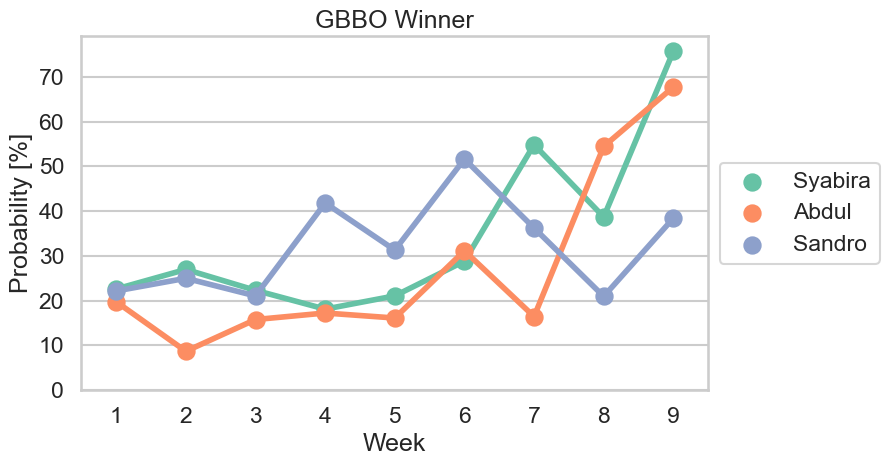

In [6]:
plot_deepbake_probs(df,'finalist',eliminated,'GBBO Winner',70)

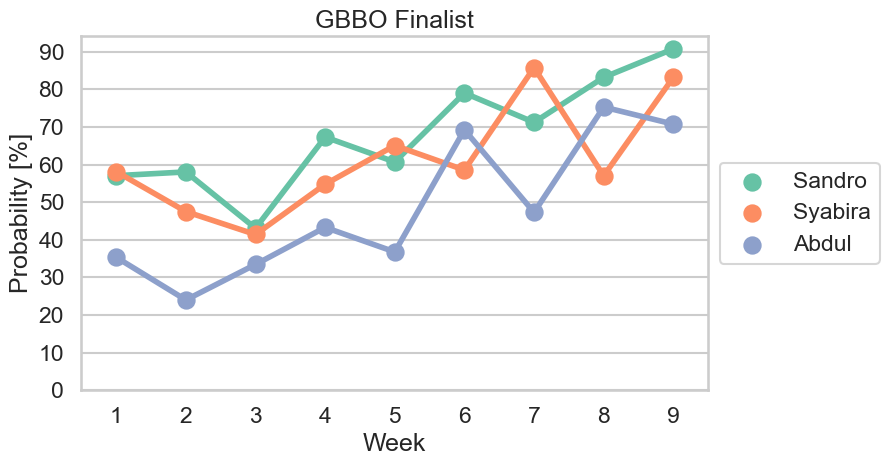

In [8]:
plot_deepbake_probs(df,'top3',eliminated,'GBBO Finalist',90)

In [9]:
def color_fader(c1,c2,mix=0): 
    #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

In [15]:
episode = 9

df = load_deepbake_pred()

rename_cols = {
    'baker' : 'Baker',
    'finalist' : 'GBBO Winner',
    'top3' : 'GBBO Finalist',
    #'thirdforth' : '3rd-4th Place',
}

keep_cols = ['baker','episode','finalist','top3']#, 'thirdforth']

df = df[keep_cols].rename(columns=rename_cols)
df = df[(df['episode']==episode) & (~df['Baker'].isin(eliminated))].drop(columns=['episode'])
c1, c2 = '#1cf1b8','#fbfffe'

pal = [color_fader(c2,c1, (i)/7) for i in range(7)]
#[color_fader(c1,c2,(i+1)/len(df)) for i in range(len(df))]
pal = mpl.colors.ListedColormap(pal)

df = df.sort_values(['GBBO Winner','GBBO Finalist'],ascending= False)
df = df.round(decimals=1)
df_styled = df.style\
  .background_gradient(cmap=pal, vmin=42, vmax=95)\
  .hide_index()\
  .format('{:.1f}',subset=['GBBO Winner','GBBO Finalist',])#'3rd-4th Place'])

/var/folders/zp/f54zy6rd5j334fnd0lds81780000gp/T/ipykernel_70209/2506046735.py:24: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df_styled = df.style\


In [16]:
[color_fader(c2,c1, (i)/10) for i in range(10)]

['#fbfffe',
 '#e5fef7',
 '#cefcf0',
 '#b8fbe9',
 '#a2f9e2',
 '#8bf8db',
 '#75f7d4',
 '#5ff5cd',
 '#49f4c6',
 '#32f2bf']

In [17]:
df_styled


Baker,GBBO Winner,GBBO Finalist
Syabira,75.7,83.2
Abdul,67.8,70.8
Sandro,38.4,90.8


In [18]:
with open('deepbake_probs.html', 'w') as f:
    f.write(df_styled.render())

/var/folders/zp/f54zy6rd5j334fnd0lds81780000gp/T/ipykernel_70209/259224156.py:2: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  f.write(df_styled.render())


In [19]:
pal

In [28]:
df

,Baker,GBBO Winner,GBBO Finalist
24,Abdul,54.5,75.3
28,Janusz,54.3,75.0
34,Syabira,38.7,57.0
33,Sandro,20.9,83.2
